## Import and functions


In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
!pip install tflearn
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 38.6 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=e7ffd652e7cd6dc1ec6140654dbcf9910d87c09ccb421e0e2317bb6aa2a7c080
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = 224
model_name = "sports_classification_cnn"
LR = 0.001
train_dir = "/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train"
test_dir = "/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Test"

In [ ]:
def create_label(image_name):
    label = image_name.split("_")[0]
    if label == "Basketball":
        return np.array([1,0,0,0,0,0])
    elif label == "Football":
        return np.array([0,1,0,0,0,0])
    elif label == "Rowing":
        return np.array([0,0,1,0,0,0])
    elif label == "Swimming":
        return np.array([0,0,0,1,0,0])
    elif label == "Tennis":
        return np.array([0,0,0,0,1,0])
    elif label == "Yoga":
        return np.array([0,0,0,0,0,1])
    else:
        return np.array([0,0,0,0,0,0])

In [ ]:
def create_train_data():
    train_data = []
    train_imgs = os.listdir(train_dir)
    for img in train_imgs:
        path = os.path.join(train_dir, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        train_data.append([np.array(img_data),create_label(img)])
    shuffle(train_data)
    np.save('train_data.npy', train_data)
    return train_data

In [ ]:
def create_test_data():
    test_data = []
    test_imgs = os.listdir(test_dir)
    for img in test_imgs:
        path = os.path.join(test_dir, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        test_data.append([np.array(img_data),create_label(img)])

    np.save('test_data.npy', test_data)
    return test_data

## Algorithm CNN

In [ ]:
if os.path.exists("train_data.npy"):
    train_data=np.load("train_data.npy", allow_pickle=True)
else:
    train_data = create_train_data()


    
if os.path.exists("test_data.npy"):
    test_data=np.load("test_data.npy", allow_pickle=True)
else:
    test_data = create_test_data()

train = train_data
test = test_data
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array([i[1] for i in train])
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1, 6)
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array([i[1] for i in test])
print(X_test.shape)
print(y_test.shape)
tf.compat.v1.reset_default_graph()
conv_input = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')
conv1 = conv_2d(conv_input, 32, 5, activation='relu')
pool1 = max_pool_2d(conv1, 5)

conv2 = conv_2d(pool1, 64, 5, activation='relu')
pool2 = max_pool_2d(conv2, 5)

conv3 = conv_2d(pool2, 128, 5, activation='relu')
pool3 = max_pool_2d(conv3, 5)

conv4 = conv_2d(pool3, 64, 5, activation='relu')
pool4 = max_pool_2d(conv4, 5)

conv5 = conv_2d(pool4, 32, 5, activation='relu')
pool5 = max_pool_2d(conv5, 5)
fully_layer = fully_connected(pool5, 1024, activation='relu')
fully_layer = dropout(fully_layer, 0.5)

cnn_layers = fully_connected(fully_layer, 6, activation='softmax')

cnn_layers = regression(cnn_layers, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(cnn_layers, tensorboard_dir='log', tensorboard_verbose=3)
print (X_train.shape)

if (os.path.exists('model.tfl.meta')):
    model.load('./model.tfl')
else:
    model.fit( X_train, y_train, n_epoch=10,
    validation_set=(X_test,y_test),
    snapshot_step=500, show_metric=True, run_id='cnn1')
    model.save('model.tfl')
    model.p
plt.show()


Training Step: 65  | total loss: 1.11747 | time: 50.427s
| Adam | epoch: 003 | loss: 1.11747 - acc: 0.5838 -- iter: 0704/1681


## Algorithm Inception v2.0


In [ ]:

  conv_input = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')
  conv1 = conv_2d(conv_input, 32, 1, activation='relu')

  conv2 = conv_2d(conv_input, 32, 1, activation='relu')
  conv2 = conv_2d(conv2, 32, 3, activation='relu')

  conv3 = conv_2d(conv_input, 32, 1, activation='relu')
  conv3 = conv_2d(conv3, 48, 3, activation='relu')
  conv3 = conv_2d(conv3, 64, 3, activation='relu')

  pool1 = max_pool_2d(conv_input, 3)
  conv4 = conv_2d(pool1, 64, 1, activation='relu')
  full_layer = tf.concat(axis=4, values=[conv1, conv2, conv3, conv4])
  fully_layer = dropout(fully_layer, 0.5)

cnn_layers = fully_connected(fully_layer, 6, activation='softmax')
cnn_layers = regression(cnn_layers, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(cnn_layers, tensorboard_dir='log', tensorboard_verbose=3)
print (X_train.shape)

if (os.path.exists('model.tfl.meta')):
    model.load('./model.tfl')
else:
    model.fit( X_train, y_train, n_epoch=10,
    validation_set=(X_test,y_test),
    snapshot_step=500, show_metric=True, run_id='cnn1')
    model.save('model.tfl')

plt.show()

  

##VGG19

In [ ]:
import random
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
from keras.applications.vgg19 import VGG19
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# vgg_model = VGG19(weights='imagenet', include_top=False)
# SVG(model_to_dot(vgg_model).create(prog='dot', format='svg'))

In [ ]:
from sklearn.model_selection import train_test_split
IMG_SIZE = 224
train_data = create_train_data()
test_data = create_test_data()
train = train_data
test = test_data
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array([i[1] for i in train])

y_train = y_train.reshape(-1, 6)
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array([i[1] for i in test])

train_images, validation_images, train_labels, validation_labels = train_test_split(X_train, y_train,
    test_size=0.1, random_state= 8)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 224, 224, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

In [ ]:
x_train_resized = resize_data(X_train)
x_test_resized = resize_data(X_test)

# make explained variable hot-encoded
y_train_hot_encoded = to_categorical(y_train)
y_test_hot_encoded = to_categorical(y_test)


##VGG16 ALGORITHM RAW

58889256/58889256 [==============================] - 4s 0us/step
0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Train on 1681 samples, validate on 688 samples
Epoch 1/50
1679/1681 [============================>.] - ETA: 0s - loss: 1.7779 - acc: 0.6093

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1681/1681 [==============================] - 49s 24ms/sample - loss: 1.7766 - acc: 0.6092 - val_loss: 0.0000e+00 - val_acc: 0.2849 - lr: 5.0000e-05
Epoch 2/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.5855 - acc: 0.8321

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.5852 - acc: 0.8322 - val_loss: 0.0000e+00 - val_acc: 0.0654 - lr: 5.0000e-05
Epoch 3/50
1679/1681 [============================>.] - ETA: 0s - loss: 0.4868 - acc: 0.8725

1681/1681 [==============================] - 41s 24ms/sample - loss: 0.4863 - acc: 0.8727 - val_loss: 0.0000e+00 - val_acc: 0.1410 - lr: 5.0000e-05
Epoch 4/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3286 - acc: 0.9114

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3286 - acc: 0.9114 - val_loss: 0.0000e+00 - val_acc: 0.1512 - lr: 5.0000e-05
Epoch 5/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3549 - acc: 0.9102

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3549 - acc: 0.9102 - val_loss: 0.0000e+00 - val_acc: 0.0828 - lr: 5.0000e-05
Epoch 6/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2694 - acc: 0.9351

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2702 - acc: 0.9346 - val_loss: 0.0000e+00 - val_acc: 0.0770 - lr: 5.0000e-05
Epoch 7/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2511 - acc: 0.9417

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.2510 - acc: 0.9417 - val_loss: 0.0000e+00 - val_acc: 0.1802 - lr: 5.0000e-05
Epoch 8/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2511 - acc: 0.9381

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.2511 - acc: 0.9381 - val_loss: 0.0000e+00 - val_acc: 0.0974 - lr: 5.0000e-05
Epoch 9/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2930 - acc: 0.9345

1681/1681 [==============================] - 41s 25ms/sample - loss: 0.2930 - acc: 0.9346 - val_loss: 0.0000e+00 - val_acc: 0.0843 - lr: 5.0000e-05
Epoch 10/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2572 - acc: 0.9459

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2572 - acc: 0.9459 - val_loss: 0.0000e+00 - val_acc: 0.1526 - lr: 5.0000e-05
Epoch 11/50
1679/1681 [============================>.] - ETA: 0s - loss: 0.1355 - acc: 0.9708

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.1353 - acc: 0.9709 - val_loss: 0.0000e+00 - val_acc: 0.1032 - lr: 5.0000e-05
Epoch 12/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2764 - acc: 0.9530

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.2763 - acc: 0.9530 - val_loss: 0.0000e+00 - val_acc: 0.0741 - lr: 5.0000e-05
Epoch 13/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.0833 - acc: 0.9833

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.0832 - acc: 0.9833 - val_loss: 0.0000e+00 - val_acc: 0.1003 - lr: 5.0000e-05
Epoch 14/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.3476 - acc: 0.9613

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3474 - acc: 0.9613 - val_loss: 0.0000e+00 - val_acc: 0.1323 - lr: 5.0000e-05
Epoch 15/50
1681/1681 [==============================] - ETA: 0s - loss: 0.0856 - acc: 0.9810

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.0856 - acc: 0.9810 - val_loss: 0.0000e+00 - val_acc: 0.1206 - lr: 5.0000e-05
Epoch 16/50
1679/1681 [============================>.] - ETA: 0s - loss: 0.2974 - acc: 0.9672

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3371 - acc: 0.9667 - val_loss: 0.0000e+00 - val_acc: 0.1817 - lr: 5.0000e-05
Epoch 17/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.1721 - acc: 0.9732

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.1720 - acc: 0.9732 - val_loss: 0.0000e+00 - val_acc: 0.1148 - lr: 5.0000e-05
Epoch 18/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.5710 - acc: 0.9518

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.5707 - acc: 0.9518 - val_loss: 0.0000e+00 - val_acc: 0.1323 - lr: 5.0000e-05
Epoch 19/50
1681/1681 [==============================] - ETA: 0s - loss: 0.0478 - acc: 0.9869

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.0478 - acc: 0.9869 - val_loss: 0.0000e+00 - val_acc: 0.1061 - lr: 5.0000e-05
Epoch 20/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.0817 - acc: 0.9839

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.0817 - acc: 0.9839 - val_loss: 0.0000e+00 - val_acc: 0.0799 - lr: 5.0000e-05
Epoch 21/50
1679/1681 [============================>.] - ETA: 0s - loss: 0.2726 - acc: 0.9702

1681/1681 [==============================] - 41s 24ms/sample - loss: 0.2733 - acc: 0.9697 - val_loss: 0.0000e+00 - val_acc: 0.1105 - lr: 5.0000e-05
Epoch 22/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.1355 - acc: 0.9792

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.1354 - acc: 0.9792 - val_loss: 0.0000e+00 - val_acc: 0.1962 - lr: 5.0000e-05
Epoch 23/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2607 - acc: 0.9738

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2607 - acc: 0.9738 - val_loss: 0.0000e+00 - val_acc: 0.1105 - lr: 5.0000e-05
Epoch 24/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2434 - acc: 0.9768

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2432 - acc: 0.9768 - val_loss: 0.0000e+00 - val_acc: 0.1570 - lr: 5.0000e-05
Epoch 25/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.3074 - acc: 0.9714

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3072 - acc: 0.9714 - val_loss: 0.0000e+00 - val_acc: 0.0945 - lr: 5.0000e-05
Epoch 26/50
1681/1681 [==============================] - ETA: 0s - loss: 0.0296 - acc: 0.9917

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.0296 - acc: 0.9917 - val_loss: 0.0000e+00 - val_acc: 0.1308 - lr: 5.0000e-05
Epoch 27/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1618 - acc: 0.9845

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.1618 - acc: 0.9845 - val_loss: 0.0000e+00 - val_acc: 0.1323 - lr: 5.0000e-05
Epoch 28/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3746 - acc: 0.9738

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3746 - acc: 0.9738 - val_loss: 0.0000e+00 - val_acc: 0.1265 - lr: 5.0000e-05
Epoch 29/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2913 - acc: 0.9798

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2913 - acc: 0.9798 - val_loss: 0.0000e+00 - val_acc: 0.1047 - lr: 5.0000e-05
Epoch 30/50
1680/1681 [============================>.] - ETA: 0s - loss: 0.2375 - acc: 0.9833

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2374 - acc: 0.9833 - val_loss: 0.0000e+00 - val_acc: 0.1395 - lr: 5.0000e-05
Epoch 31/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1906 - acc: 0.9845

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.1906 - acc: 0.9845 - val_loss: 0.0000e+00 - val_acc: 0.1642 - lr: 5.0000e-05
Epoch 32/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1445 - acc: 0.9887

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.1445 - acc: 0.9887 - val_loss: 0.0000e+00 - val_acc: 0.1221 - lr: 5.0000e-05
Epoch 33/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1461 - acc: 0.9923

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.1461 - acc: 0.9923 - val_loss: 0.0000e+00 - val_acc: 0.1512 - lr: 5.0000e-05
Epoch 34/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2149 - acc: 0.9839

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2149 - acc: 0.9839 - val_loss: 0.0000e+00 - val_acc: 0.1294 - lr: 5.0000e-05
Epoch 35/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2665 - acc: 0.9887

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2665 - acc: 0.9887 - val_loss: 0.0000e+00 - val_acc: 0.0988 - lr: 5.0000e-05
Epoch 36/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3011 - acc: 0.9822

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3011 - acc: 0.9822 - val_loss: 0.0000e+00 - val_acc: 0.1119 - lr: 5.0000e-05
Epoch 37/50
1679/1681 [============================>.] - ETA: 0s - loss: 0.1281 - acc: 0.9911

1681/1681 [==============================] - 40s 24ms/sample - loss: 0.1280 - acc: 0.9911 - val_loss: 0.0000e+00 - val_acc: 0.1192 - lr: 5.0000e-05
Epoch 38/50
1681/1681 [==============================] - ETA: 0s - loss: 0.0923 - acc: 0.9929

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.0923 - acc: 0.9929 - val_loss: 0.0000e+00 - val_acc: 0.1105 - lr: 5.0000e-05
Epoch 39/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2654 - acc: 0.9869

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2654 - acc: 0.9869 - val_loss: 0.0000e+00 - val_acc: 0.1831 - lr: 5.0000e-05
Epoch 40/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3379 - acc: 0.9780

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.3379 - acc: 0.9780 - val_loss: 0.0000e+00 - val_acc: 0.1032 - lr: 5.0000e-05
Epoch 41/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2363 - acc: 0.9881

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2363 - acc: 0.9881 - val_loss: 0.0000e+00 - val_acc: 0.1410 - lr: 5.0000e-05
Epoch 42/50
1681/1681 [==============================] - ETA: 0s - loss: 0.8122 - acc: 0.9762

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.8122 - acc: 0.9762 - val_loss: 0.0000e+00 - val_acc: 0.0974 - lr: 5.0000e-05
Epoch 43/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1007 - acc: 0.9958

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.1007 - acc: 0.9958 - val_loss: 0.0000e+00 - val_acc: 0.1265 - lr: 5.0000e-05
Epoch 44/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2060 - acc: 0.9905

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2060 - acc: 0.9905 - val_loss: 0.0000e+00 - val_acc: 0.1265 - lr: 5.0000e-05
Epoch 45/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2409 - acc: 0.9893

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2409 - acc: 0.9893 - val_loss: 0.0000e+00 - val_acc: 0.1163 - lr: 5.0000e-05
Epoch 46/50
1681/1681 [==============================] - ETA: 0s - loss: 0.1939 - acc: 0.9881

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.1939 - acc: 0.9881 - val_loss: 0.0000e+00 - val_acc: 0.1090 - lr: 5.0000e-05
Epoch 47/50
1681/1681 [==============================] - ETA: 0s - loss: 0.4809 - acc: 0.9845

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.4809 - acc: 0.9845 - val_loss: 0.0000e+00 - val_acc: 0.1221 - lr: 5.0000e-05
Epoch 48/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2070 - acc: 0.9899

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.2070 - acc: 0.9899 - val_loss: 0.0000e+00 - val_acc: 0.0770 - lr: 5.0000e-05
Epoch 49/50
1681/1681 [==============================] - ETA: 0s - loss: 0.3129 - acc: 0.9893

1681/1681 [==============================] - 39s 23ms/sample - loss: 0.3129 - acc: 0.9893 - val_loss: 0.0000e+00 - val_acc: 0.1076 - lr: 5.0000e-05
Epoch 50/50
1681/1681 [==============================] - ETA: 0s - loss: 0.2957 - acc: 0.9881

1681/1681 [==============================] - 38s 23ms/sample - loss: 0.2957 - acc: 0.9881 - val_loss: 0.0000e+00 - val_acc: 0.0988 - lr: 5.0000e-05


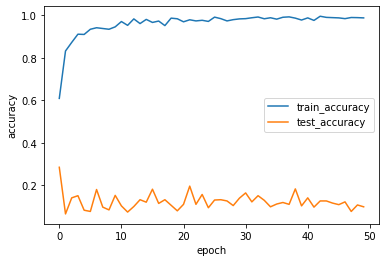

In [ ]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze four convolution blocks
for layer in vgg_model.layers[:15]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

from keras import layers, models, Model, optimizers
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test), callbacks=[lr_reduce,checkpoint])

import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)




In [ ]:
# import pickle
# with open('/content/VGG16_RAW.pkl', 'wb') as fp:
#     pickle.dump(transfer_model, fp)
  
transfer_model.save('VGG16_RAW.h5')
transfer_model.save_weights('VGG16_RAW_Weights.h5')


##VGG ALGORITHM AUG

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/50


<ipython-input-11-bfa68624eab0>:34: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = transfer_model.fit_generator(train_generator, validation_data=(X_test,y_test), epochs=50, shuffle=True, callbacks=[lr_reduce],verbose=1)


17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 98.8824 - loss: 5.2473 - acc: 0.2338

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


17/17 [==============================] - 43s 1s/step - batch: 8.0000 - size: 98.8824 - loss: 5.2494 - acc: 0.2338 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 2/50
17/17 [==============================] - 18s 1s/step - batch: 8.0000 - size: 98.8824 - loss: 1.8853 - acc: 0.2487 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 3/50
17/17 [==============================] - 21s 1s/step - batch: 8.0000 - size: 98.8824 - loss: 1.9472 - acc: 0.2701 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 4/50
17/17 [==============================] - 21s 1s/step - batch: 8.0000 - size: 98.8824 - loss: 2.0016 - acc: 0.2677 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 5/50
17/17 [==============================] - 21s 1s/step - batch: 8.0000 - size: 98.8824 - loss: 2.3340 - acc: 0.2713 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - lr: 0.0010
Epoch 6/50
17/17 [==============================] - 21s 1s/step - batch: 8.0000 - size: 98.8824 

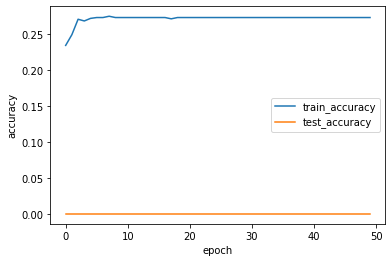

In [ ]:
from keras.applications import VGG16
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers[:15]:
  layer.trainable = False
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)


from keras import layers, models, Model, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint


lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)


#Augment images
train_datagen = ImageDataGenerator(zoom_range=0.2, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2)
#Fit augmentation to training images
train_generator = train_datagen.flow(X_train,y_train,batch_size=100)
#Compile model
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
#Fit model
history = transfer_model.fit_generator(train_generator, validation_data=(X_test,y_test), epochs=50, shuffle=True, callbacks=[lr_reduce],verbose=1)

transfer_model.save('model_vgg16_off.h5')
transfer_model.save_weights('model_vgg16_weights_off.h5')



import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)




In [ ]:
predd=transfer_model.predict(X_test)
label=np.argmax(predd, axis=1)
imgs_name=os.listdir(test_dir)
import pandas as pd
df = pd.DataFrame({'image_name': imgs_name,
                   'label': label})
print(df)
df.to_csv("sport_2.csv",index=False)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    image_name  label
0      335.jpg      0
1      384.jpg      0
2      596.jpg      0
3       15.jpg      0
4      439.jpg      0
..         ...    ...
683    161.jpg      5
684    428.jpg      5
685    172.jpg      5
686    279.jpg      5
687    314.jpg      5

[688 rows x 2 columns]


In [ ]:

from keras.models import Sequential, Model, load_model
import pickle

import keras.utils as image
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import os
import pandas as pd
import os
import cv2

transfer_model = load_model('/content/VGG16_RAW.h5')


from sklearn.model_selection import train_test_split
IMG_SIZE = 224

test_data = create_test_data()
test = test_data

X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 224, 224, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

test = resize_data(X_test)


predd=transfer_model.predict(test)
label=np.argmax(predd, axis=1)
imgs_name=os.listdir(test_dir)
import pandas as pd
df = pd.DataFrame({'image_name': imgs_name,
                   'label': label})
print(df)
df.to_csv("sport_2.csv",index=False)



# img = image.load_img(img_path, target_size=(224,224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# pre = model.predict(x)
# mmm = np.argmax(pre , axis=1)+1
# print(mmm)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    image_name  label
0      335.jpg      4
1      384.jpg      0
2      596.jpg      0
3       15.jpg      0
4      439.jpg      4
..         ...    ...
683    161.jpg      5
684    428.jpg      1
685    172.jpg      5
686    279.jpg      5
687    314.jpg      5

[688 rows x 2 columns]
